# Estudiando ANOVA

¿Cuáles son los límites del universo? ¿Dios existe? ¿Cuál es el punto exacto del arroz? ¿Qué carajo es ANOVA? preguntas que la humanidad ha intentado responder desde sus orígenes, en este opúsculo pretendo responder la única sin respuesta.

## ¿Qué carajo es ANOVA?

Es un método para comparar distintos tratamientos, ni más, ni menos. La idea general es separar la variación total en las partes con las que contribuye cada fuente de variación en el experimento. Se separan la variabilidad debida a los tratamientos y la debida al error. 

- Cuando la primera predomina "claramente" sobre la segunda, es cuando se concluye que los tratamientos tienen efecto, o dicho de otra manera, las medias son diferentes. 
- Cuando los tratamientos no dominan, contribuyen igual o menos que el error, por lo que se concluye que las medias son iguales

Esto se plantea en modo de test, con H0 suponiendo que las medias son iguales y H1 diciendo que al menos un par son distintas, pero **¿cómo hacemos el test, cuál es nuestro estadístico de prueba?**

Bueno, acá está la posta, lo que tenemos que hacer es armar ese estadístico dividiendo algo que me indica la variabilidad entre los tratamientos sobre la variabilidad dentro de cada tratamiento. 

ANOVA significa análisis de la varianza, pero ¿dónde entra en juego la varianza? Bueno, debe venir del supuesto para poder realizar el test, que dice que los tratamientos poseen varianza constante. 

Es bueno entender lo que significa cada notación, ya que luego lo usamos a troche y moche, si lo entendemos de entrada ganamos vida.

## Notación

Tenemos k cantidad de tratamientos, y en cada tratamiento tenemos un número $n_i$ observaciones. $n_i$ es la cantidad de observaciones del tratamiento *i*.

- Sumamos todas las observaciones $n_i$ de cada tratamiento (medias)

$$N = \sum_{i=1}^{t} n_i$$

- Media de cada tratamiento (muestra)

$$\overline{Y}_{i \cdot} = {{1} \over {n_i}} \sum_{j=1}^{n_i}y_{ij}$$

- Media global, promedio de todas las observaciones

$$\overline{Y}_{\cdot \cdot} = {{1} \over {N}} \sum_{i=1}^{k}\sum_{j=1}^{n_j} y_{ij}$$

## Modelo

¿Cómo podemos suponer la distribución de las medias de las observaciones? Bueno, podemos armar un modelo/ecuación que nos describa este comportamiento:

$$y_{ij}=\mu_i + \epsilon_{ij}$$

donde $y_{ij}$ es el valor de la observación *j* del tratamiento *i*, $\mu_i$ es la media de cada tratamiento *i* y $\epsilon_{ij}$ es el error. Otra manera de expresarlo es:

$$y_{ij}=\mu + \tau_i + \epsilon_{ij}$$

donde $\mu$ es una media global y $\tau_i$ es el efecto de cada tratamiento *i*. En base a este modelo lo que buscamos es probar la hipótesis de igualdad de los tratamientos con respecto a la media, es decir:

- H0: $\mu_1 = \mu_2 \cdots \mu_k = \mu$
- H1: $\mu_i \neq \mu_j$

Lo que es equivalente a:

- H0: $\tau_1 = \tau_2 \cdots \tau_k = 0$
- H1: $\tau_i \neq 0$

Donde $\tau_i$ es el efecto del tratamiento *i* sobre la variable respuesta, que significa el desplazamiento de una media global $\mu$, es decir, $\tau_i = \mu_i-\mu$

## Método

Para probar las hipótesis dadas lo primero es decomponer la variabilidad total de los datos en sus dos componentes:

- debida a tratamientos (entre tratamientos)
- debida al error aleatorio (dentro de tratamientos)

**Suma de Cuadrados de Tratamientos ($SC_{ENTRE}$)**

Mide la diferencia entre los tratamientos, si son muy diferentes entre sí, entonces el valor tenderá a ser grande. Tiene k-1 grados de libertad.

$$SC_{ENTRE} = \sum_{i=1}^k n_i \left(\overline{Y}_{i \cdot} - \overline{Y}_{\cdot \cdot} \right)^2$$

**Suma de Cuadrados del Error ($SC_{DENTRO}$)**

Mide la variación entre las observaciones de cada tratamiento, si hay mucha diferencia entonces tenderá a ser un valor grande. Tiene N-k grados de libertad.

$$SC_{DENTRO} = \sum_{i=1}^k \sum_{j=1}^{n_i}  \left(Y_{i j} - \overline{Y}_{i \cdot} \right)^2$$

## Estadístico de prueba

Si dividimos las cada suma de cuadrados por sus respectivos grados de libertad obtenemos algo que denominamos *Suma de los cuadrados medios, MCentre y MCdentro*, veamos:

$$MC_{ENTRE} = {{SC_{ENTRE}} \over {k-1}}$$

$$MC_{DENTRO} = {{SC_{DENTRO}} \over {N-k}}$$

donde k es la cantidad de tratamientos y N la cantidad de observaciones totales. Che, acordate que *MCdentro* es un estimador de la varianza.

Ahora sí, armamos el estadístico F0:

$$F0 = {{MC_{ENTRE}} \over {MC_{DENTRO}}} \approx F(k-1, N-k)$$

Con F0 calculamos el pvalor, y con esto sabremos si **RECHAZAMOS o ACEPTAMOS H0** para un nivel $\alpha$ prefijado.

- Si rechazamos H0: tamo al horno, hay que hacer **contrastes y comparaciones múltiples**
- Si aceptamos H0: listo, pero vamos a tener que saber qué potencia tenemos, tal vez nos damos cuenta que hay que aumentar el n.

## Contrastes

Estamos acá porque rechazamos H0 y es lo último en guarachas, o sea, las medias no son todas iguales, entonces vamos a contrastar entre algunas en particular para ver esa diferencia de medias.

Un contraste es esto:

$$C = \sum_{i=1}^{t}k_i\mu_i$$

pero teniendo la condición que sumando los k nos dan 0: $\sum_{i=1}^tk_i=0$.

Pero pensemos, ¿qué significan estos contrastes? Bueno, bien bien en claro no lo tengo, pero sí se que tiene sentido restar las medias para saber si hay diferencia o no. Entonces, supongamos que queremos contrastar el tratamiento 1 con el 3, esto sería: $C1 = \mu1-\mu3$, suponiendo que tenemos 4 tratamientos, los k que tenemos entonces son:

$$k = (1,0,-1,0)$$

y ahora tenemos que volver a hacer un test para saber si nuestra nueva H0 se rechaza o acepta, sería:

- H0: $C1 = 0$
- H1: $C1 \neq 0$

¿Cómo resolvemos este test? Mamita querida, esto no termina nunca: 

- tenemos que hacer un Intervalo de Confianza (IC) para este C1 y vemos si el 0 está dentro.
- Para hacer el IC necesitamos un estimador del C1: $\overline{C}=\sum_{i=1}^t k_i \overline{y}_{i \cdot}$ 

El IC siempre es de la forma: $\theta \pm A \sqrt{var(\theta)}$ que termina quedando de la siguiente forma:

$$C \pm t_{\alpha/2}(N-t) * S_p * \sqrt{\sum_{i=1}^{t} {{k_i^2}\over{n_i}}}$$

**OJITO:** *no confundir la primer t, de la distribución t-student con la t del extremo de la sumatoria que refiere a la cantidad de tratamientos. Tampoco confundir la k que usamos acá , que son los coeficientes de los constrastes con la k de la sección previa que hacía referencia a la cantidad de tratamientos.*

## Comparaciones simultáneas

Acá lo que hacemos son IC para contrastes simultáneos. ¿WTF? Claro, como vamos a hacer los contrastes simultáneos acá entra en juego cómo tomamos el $\alpha$, de aquí que hay varios métodos para hacerlo:

### Bonferroni

### Tukey

### Dunnett

### Scheffe

### Contrastes Ortogonales

## Enunciado
Para estudiar si el tipo de dieta influye en el tiempo de supervivencia de ratas, se midió el tiempo de supervivencia de 349 ratas femeninas que fueron asignados aleatoriamente a uno de los 6 tipos diferentes de dietas das a continuación:

In [1]:
datos = read.table('/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/datos/dietafile.R', header = TRUE)

In [2]:
head(datos)
attach(datos)

cuantovive,dieta
35.5,NP
35.4,NP
34.9,NP
34.8,NP
33.8,NP
33.5,NP


## Resumen gráfico

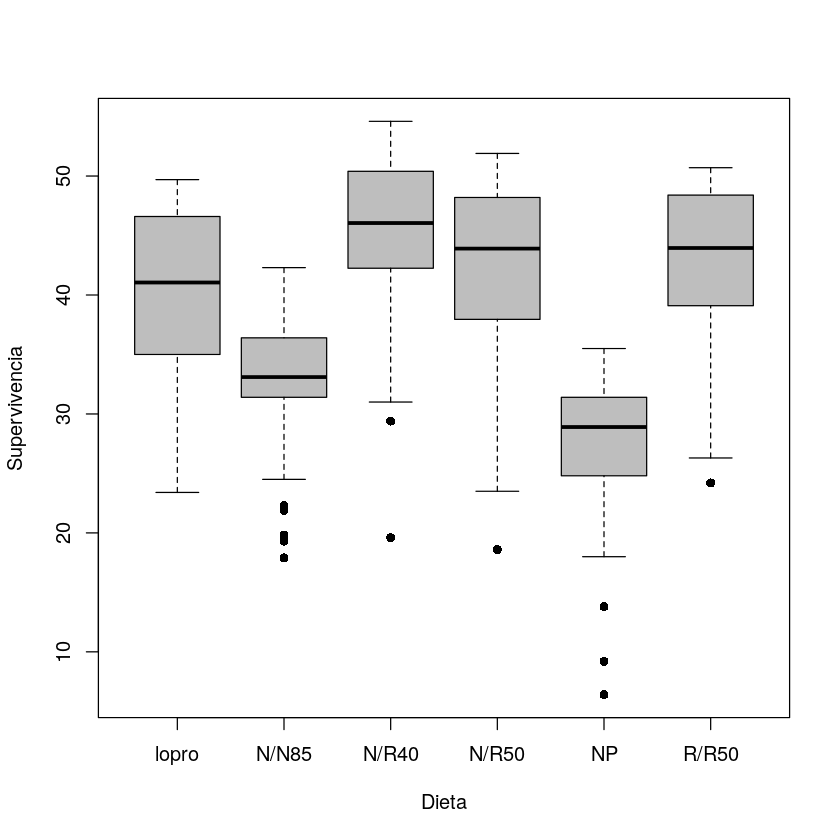

In [3]:
boxplot(cuantovive~dieta, col = 'gray', pch = 16, xlab = 'Dieta', ylab = 'Supervivencia')

## Resumen numérico

Veamos el n de cada tipo de dieta, su promedio y su desvío

In [4]:
# cantidad de elementos de cada muestra
ns = tapply(cuantovive, dieta, length)
# promedios de cada tipo de dieta
promedio = tapply(cuantovive, dieta, mean)
# desvios
desvio = tapply(cuantovive, dieta, sd)
print(cbind(ns, promedio, desvio), digits = 3)


      ns promedio desvio
lopro 56     39.7   6.99
N/N85 57     32.7   5.13
N/R40 60     45.1   6.70
N/R50 71     42.3   7.77
NP    49     27.4   6.13
R/R50 56     42.9   6.68


## Tabla ANOVA 
Mostramos la tabla ANOVA

In [6]:
dieta = as.factor(dieta)
modelo = aov(cuantovive~dieta)
summary(modelo)

             Df Sum Sq Mean Sq F value Pr(>F)    
dieta         5  12734  2546.8    57.1 <2e-16 ***
Residuals   343  15297    44.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Chequeo de normalidad**

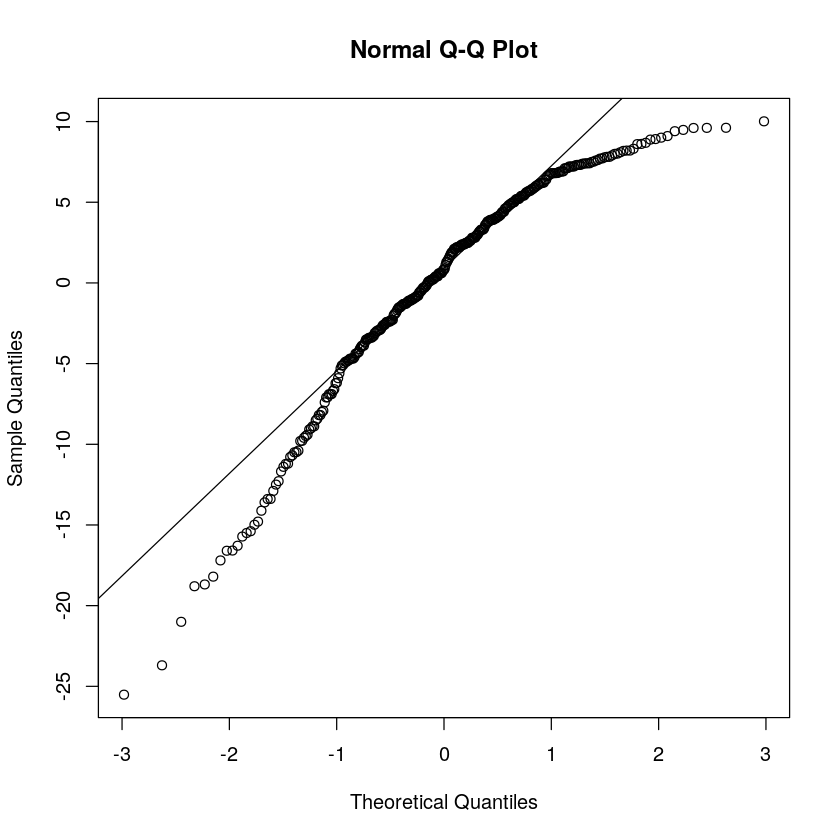

In [7]:
qqnorm(modelo$residuals)
qqline(modelo$residuals)

**Chequeo de varianza constante**

In [10]:
library(car)
leveneTest(modelo$residuals)

ERROR: Error in is.factor(group): argument "group" is missing, with no default


Otra forma de llegar a lo mismo es hacer el modelo para H1 y compararlo con el modelo H0

In [11]:
modeloH1 = lm(cuantovive~dieta)
modeloH0 = lm(cuantovive~1)
anova(modeloH1, modeloH0)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
343,15297.42,NA,NA,NA,NA
348,28031.36,-5,-12733.94,57.10431,4.111744e-43
